In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
#get stock market data from csv file

df_stock = pd.read_csv('..\Data\MSFT_historical_data_yfinance.csv')
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock.set_index('Date', inplace=True)
df_stock.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-11-22,378.000000,379.790009,374.970001,377.850006,23345300
2023-11-24,377.329987,377.970001,375.140015,377.429993,10176600
2023-11-27,376.779999,380.640015,376.200012,378.609985,22179200
2023-11-28,378.350006,383.000000,378.160004,382.700012,20453100
2023-11-29,383.760010,384.299988,377.440002,378.850006,28942500


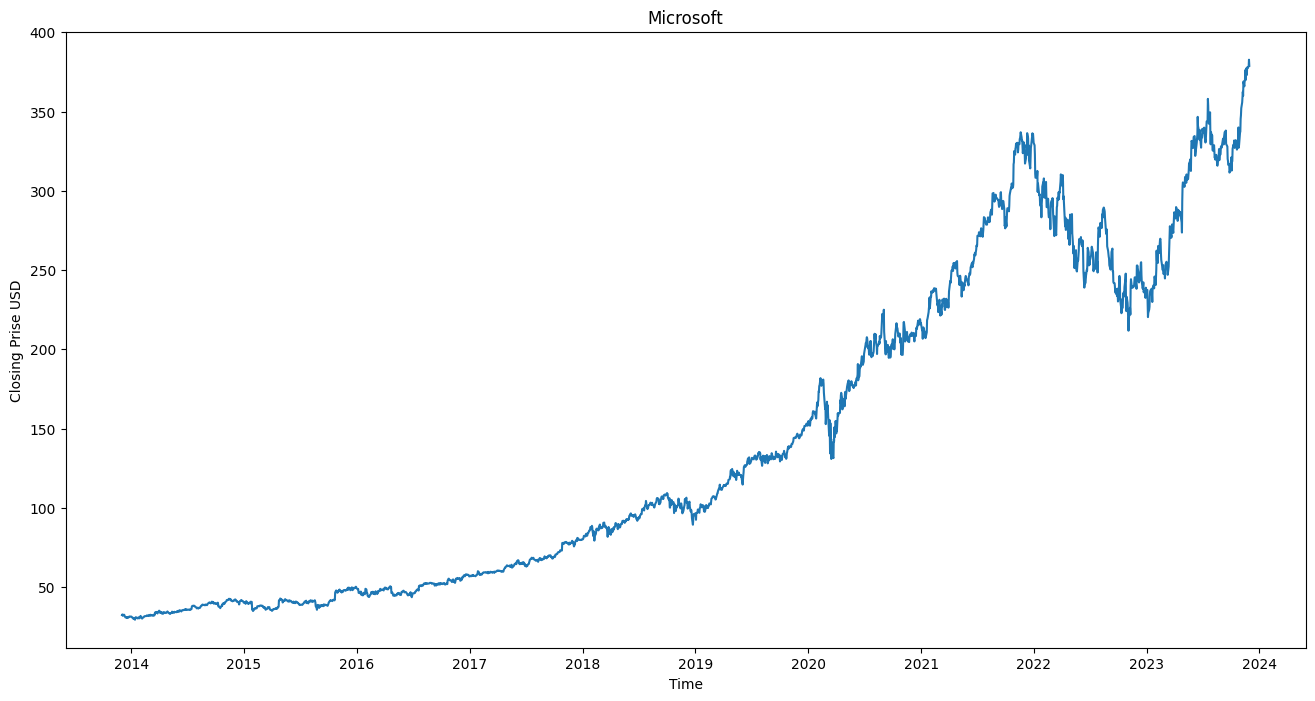

In [7]:
#Visualizing the closing prices of the stock

plt.figure(figsize=(16,8))
plt.title('Microsoft')
plt.xlabel('Time')
plt.ylabel('Closing Prise USD')
plt.plot(df_stock['Close'])
plt.show()

In [8]:
# Predicting 100 days into the future.
future_days = 100
df_prediction = df_stock['Close']
df_prediction = pd.DataFrame(df_prediction)
df_prediction['Prediction'] = df_prediction['Close'].shift(-future_days)

X = np.array(df_prediction.drop(['Prediction'], axis=1))[:-future_days]
print(X)
y = np.array(df_prediction['Prediction'])[:-future_days]
print(y)

[[ 32.3770752 ]
 [ 32.25917816]
 [ 32.7896843 ]
 ...
 [339.85919189]
 [335.82592773]
 [330.45819092]]
[ 34.67292404  34.36749649  34.274189   ... 378.60998535 382.70001221
 378.8500061 ]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

x_future = df_prediction.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[269.77792358],
       [267.62161255],
       [260.49679565],
       [256.43261719],
       [251.07658386],
       [249.92388916],
       [253.16334534],
       [247.64836121],
       [248.58242798],
       [247.84707642],
       [244.71694946],
       [249.52642822],
       [253.68005371],
       [255.25010681],
       [252.54725647],
       [252.10009766],
       [250.72880554],
       [247.02232361],
       [252.31869507],
       [259.14541626],
       [263.76608276],
       [274.45822144],
       [277.66781616],
       [270.51324463],
       [272.05343628],
       [270.57284546],
       [275.90899658],
       [278.80065918],
       [274.63708496],
       [273.49432373],
       [278.74102783],
       [282.25869751],
       [286.48187256],
       [285.41867065],
       [285.36895752],
       [282.54684448],
       [289.7611084 ],
       [287.56503296],
       [281.04638672],
       [281.70223999],
       [288.01217651],
       [284.33554077],
       [286.97872925],
       [286

In [10]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[331.09558105 335.80603027 230.20428467 343.81274414 344.30075073
 295.85861206 242.96563721 272.05343628 342.34884644 343.68328857
 349.52905273 217.55245972 329.3527832  336.97116089 334.53131104
 334.94955444 326.14611816 325.30960083 326.42495728 328.74533081
 324.7020874  320.8979187  292.56494141 320.52941895 322.70040894
 320.52941895 319.75100708 316.23815918 315.83895874 321.22802734
 321.80682373 326.33764648 319.32189941 322.32580566 323.04434204
 327.74478149 328.12402344 327.09613037 278.60919189 249.07333374
 226.83863831 338.01394653 333.59289551 337.25549316 337.25549316
 338.01394653 338.01394653 329.55111694 323.74887085 327.98428345
 320.12026978 318.88278198 316.3678894  314.52662659 311.50775146
 314.52662659 313.00473022 315.11044312 318.88278198 312.75521851
 318.31393433 318.71310425 326.59713745 329.15194702 331.38739014
 331.74667358 330.48922729 327.06619263 331.96624756 331.38739014
 329.44134521 330.64889526 326.0083313  328.6529541  329.86050415
 339.97998

In [11]:
predictions = tree_prediction 
valid = df_prediction[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\kalle\AppData\Local\Temp\ipykernel_19616\3397228505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


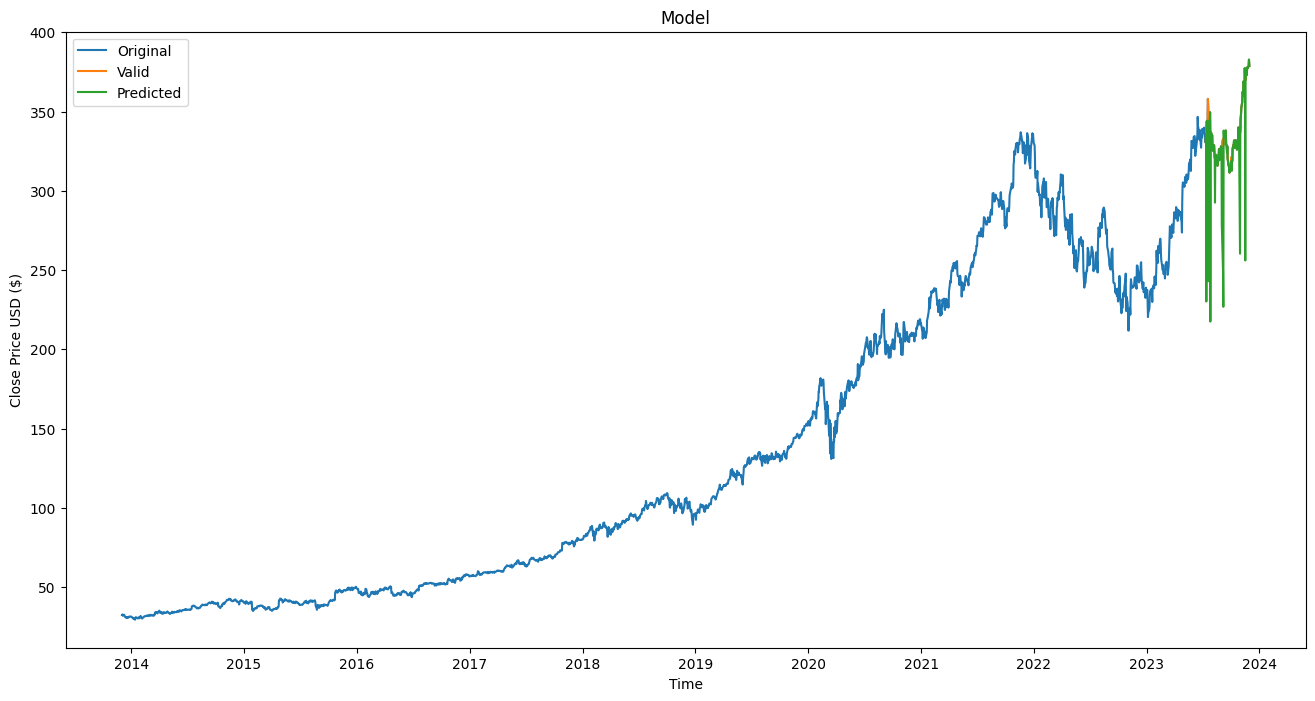

In [12]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Time')
plt.ylabel('Close Price USD ($)')
plt.plot(df_prediction['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

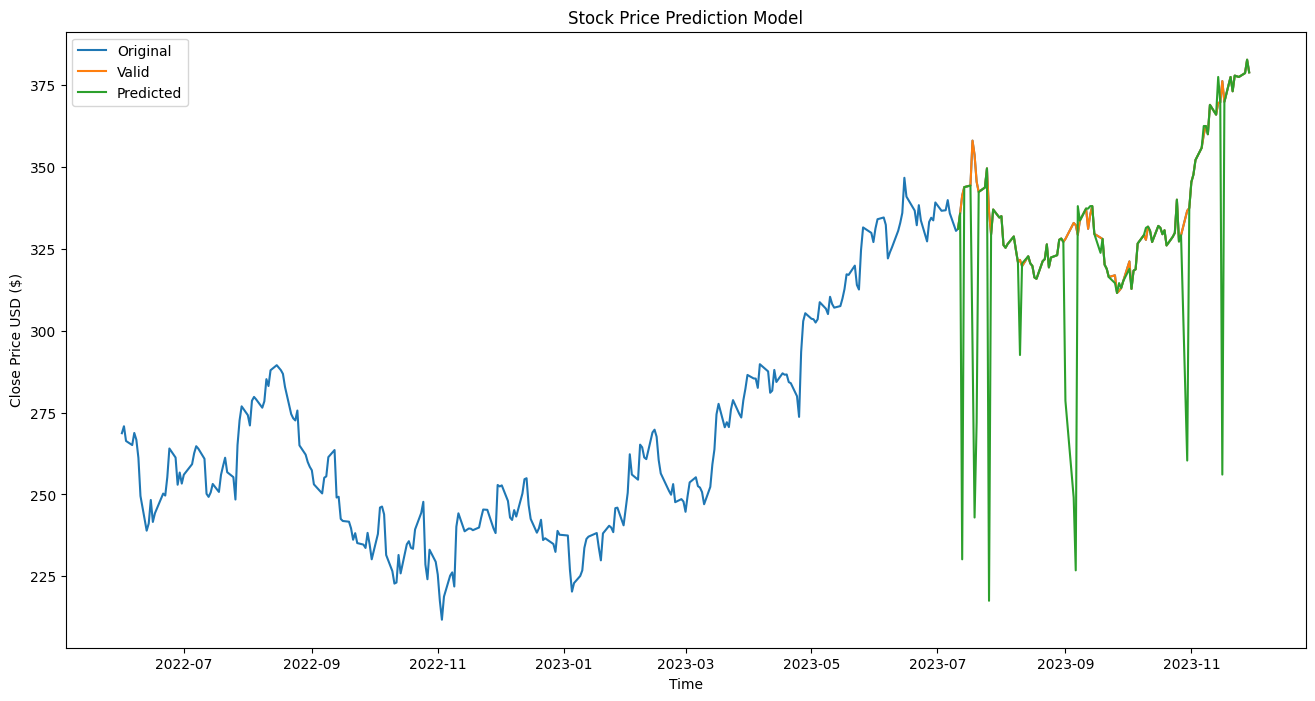

In [15]:
df_prediction = df_prediction[df_prediction.index >= '2022-06-01'] 


plt.figure(figsize=(16,8))
plt.title("Stock Price Prediction Model")
plt.xlabel('Time')
plt.ylabel('Close Price USD ($)')
plt.plot(df_prediction['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

The decision tree algorithm is quite popular for the interpretability and ease of use. However, one can see that there are limitations: We see spikes going down that might occur when using decision tree algorithms for stock market predition. One reason can be that decision trees are sensitive to outliers in the data. The decison tree may create splits or branches to accommodate these outliers. s
Moreover, decision trees have a tendency to overfit the training data, capturing specific patterns that might not generalize well to unseen data. Overfitting can lead to spikes in predictions as the model tries to fit the training data too closely.